In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import seaborn as sns

In [2]:
#importa datos el fluke
fluke = pd.read_csv("../../data/fluke_25062021_28062021.csv",encoding="iso-8859-1",
                    skiprows=13,usecols=[7,11],
                    names=["fluke","tiempo"],)
fluke.tiempo = pd.to_datetime(fluke.tiempo,format="%d/%m/%Y %H:%M")
fluke.set_index("tiempo",inplace=True)
fluke.fluke = fluke.fluke.str.replace("ppm","")
fluke.fluke = fluke.fluke.astype("float64")
fluke = fluke[~fluke.index.duplicated()]
#fluke.info()
fluke = fluke.resample("60S").mean()
fluke

,fluke
tiempo,
2021-06-25 15:04:00,409.0
2021-06-25 15:05:00,411.0
2021-06-25 15:06:00,405.0
2021-06-25 15:07:00,421.0
2021-06-25 15:08:00,408.0
...,...
2021-06-28 12:12:00,479.0
2021-06-28 12:13:00,478.0
2021-06-28 12:14:00,468.0


In [3]:
#importa datos del aranet4

aranet = pd.read_csv("../../data/aranet4_2021-06-28T12_08_22.csv",index_col=0,parse_dates=True,
                    names=["aranet","To","HR","P"],skiprows=1)

aranet = aranet.resample("60S").mean()
aranet

,aranet,To,HR,P
2021-06-25 00:05:00,903,26.4,63,872
2021-06-25 00:06:00,908,26.4,63,872
2021-06-25 00:07:00,905,26.4,63,872
2021-06-25 00:08:00,933,26.4,62,872
2021-06-25 00:09:00,916,26.4,63,872
...,...,...,...,...
2021-06-28 12:03:00,467,25.7,68,879
2021-06-28 12:04:00,476,25.6,67,879
2021-06-28 12:05:00,476,25.6,67,879
2021-06-28 12:06:00,469,25.6,68,879


In [4]:
camara = pd.read_csv("../../data/sensores_20210625_20210628.csv",index_col=0,parse_dates=True)
camara = camara.resample("60S").mean()
camara

,cdm4160,cjmcu811,sen0219,t3022,mh-z14a,sen0220
ts,,,,,,
2021-06-25 00:00:00,88.500000,2296.111111,1285.500000,929.500000,987.000000,349.700000
2021-06-25 00:01:00,90.888889,2297.800000,1366.750000,934.000000,1154.750000,348.750000
2021-06-25 00:02:00,88.000000,2294.300000,1195.666667,938.000000,986.333333,348.500000
2021-06-25 00:03:00,90.777778,2299.800000,1286.250000,938.000000,1101.750000,349.222222
2021-06-25 00:04:00,88.888889,2307.900000,1252.666667,943.333333,1001.000000,350.375000
...,...,...,...,...,...,...
2021-06-28 09:54:00,741.111111,726.400000,1054.250000,713.500000,-1.000000,661.000000
2021-06-28 09:55:00,749.555556,727.600000,988.750000,714.000000,-1.000000,661.125000
2021-06-28 09:56:00,755.222222,727.200000,1122.500000,716.500000,-1.000000,660.111111


In [5]:
# camara.columns
sensores = ['t3022', 'mh-z14a', 'sen0219', 'cdm4160', 'cjmcu811', 'sen0220']

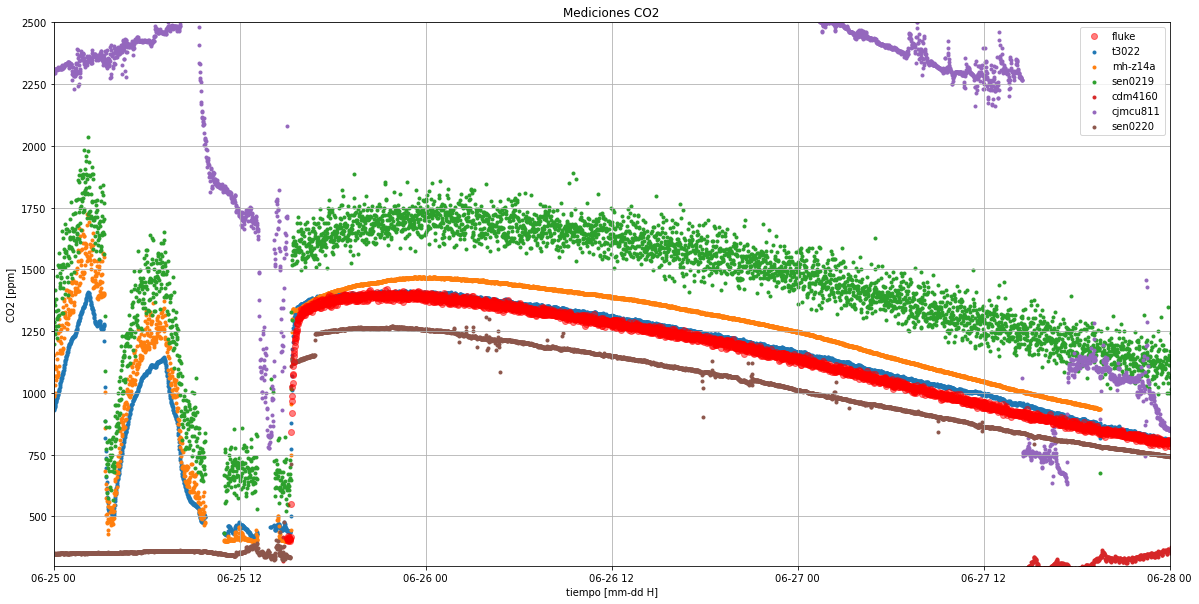

In [6]:
fig, ax = plt.subplots(figsize=(20,10))

fecha1 = parse("2021-06-25") 
fecha2 = fecha1 + pd.Timedelta("3D")

ax.set_xlim(fecha1,fecha2)
ax.set_ylim(300,2500)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo [mm-dd H]")
ax.set_title("Mediciones CO2")

#ax.plot(aranet.aranet,"ro",label="aranet",alpha=0.5)
ax.plot(fluke.fluke,"ro",label="fluke",alpha=0.5)
for sensor in sensores:
    ax.scatter(camara[sensor].index,camara[sensor],label=sensor,marker=".")


ax.legend()
ax.grid()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

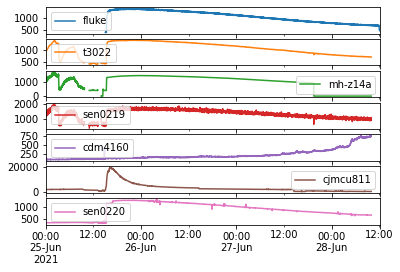

In [7]:
data = pd.concat([fluke["fluke"],camara[sensores]],axis=1)



data.plot(subplots=True)
# data.aranet - data.sen0219

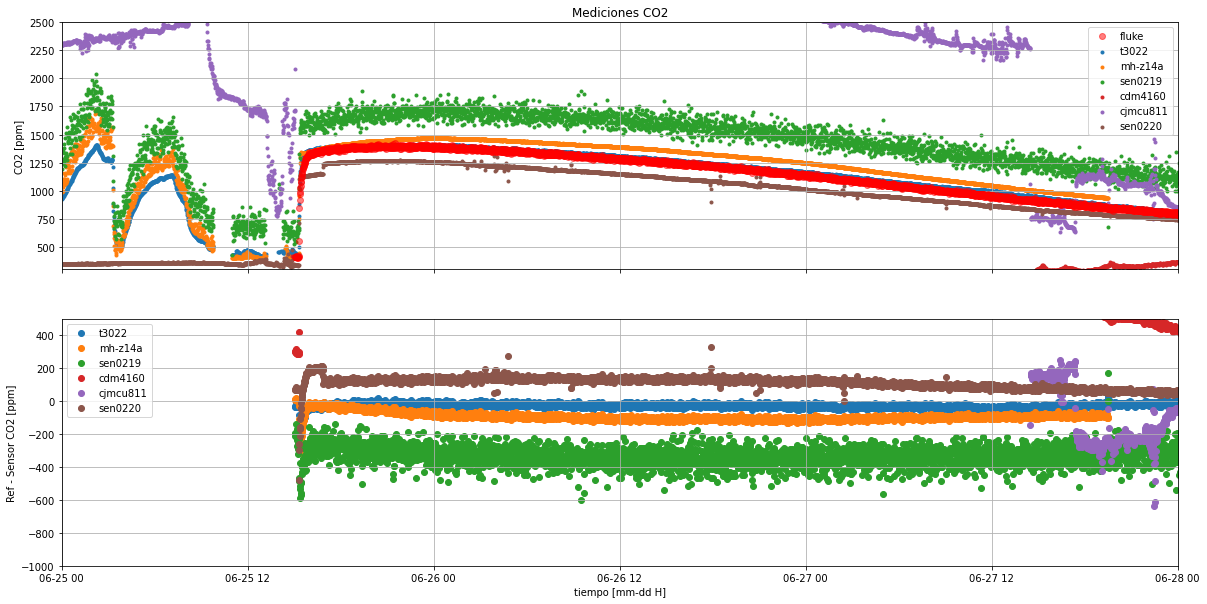

In [8]:
ref = "fluke"
fig, ax = plt.subplots(2,figsize=(20,10),sharex=True)

fecha1 = parse("2021-06-25") 
fecha2 = fecha1 + pd.Timedelta("3D")


ax[0].set_ylim(300,2500)
ax[0].set_ylabel("CO2 [ppm]")
ax[0].set_title("Mediciones CO2")


ax[0].set_xlim(fecha1,fecha2)
ax[1].set_xlim(fecha1,fecha2)

ax[1].set_ylim(-1000,500)
ax[1].set_ylabel("Ref - Sensor CO2 [ppm]")
ax[1].set_xlabel("tiempo [mm-dd H]")
# ax[1].set_title("Mediciones CO2")

ax[0].plot(fluke.fluke,"ro",label="fluke",alpha=0.5)
for sensor in sensores:
    ax[0].scatter(data[sensor].index,data[sensor],label=sensor,marker=".")


for sensor in sensores:
    ax[1].scatter(data.index,data[ref]-data[sensor],label=sensor)


ax[1].legend()
ax[1].grid()
ax[0].legend()
ax[0].grid()





diferencia = {}
datos = data[fecha1:fecha2]
for sensor in sensores:
    valor = (data[fecha1:fecha2][ref] - data[fecha1:fecha2][sensor]).mean()
    diferencia.update({sensor:[-valor]})


In [9]:
diferencia = pd.concat([datos[sensor]-datos[ref] for sensor in sensores],axis=1)
diferencia.columns = sensores

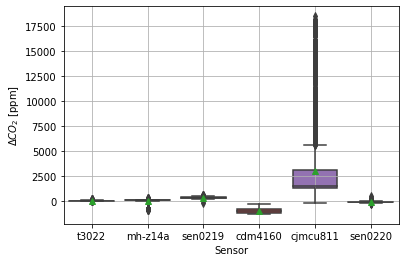

In [10]:
plt.ylabel("$\Delta CO_2$ [ppm]")
plt.xlabel("Sensor")
sns.boxplot(data=diferencia,showmeans=True)

plt.grid() 

In [11]:
for sensor in sensores:
    print(sensor,(data[fecha1:fecha2][ref] - data[fecha1:fecha2][sensor]).mean())

t3022 -26.923690371671057
mh-z14a -19.822285630670173
sen0219 -332.7111989074237
cdm4160 959.2794670438656
cjmcu811 -2966.195266896145
sen0220 112.14243639412648
